In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

%matplotlib inline

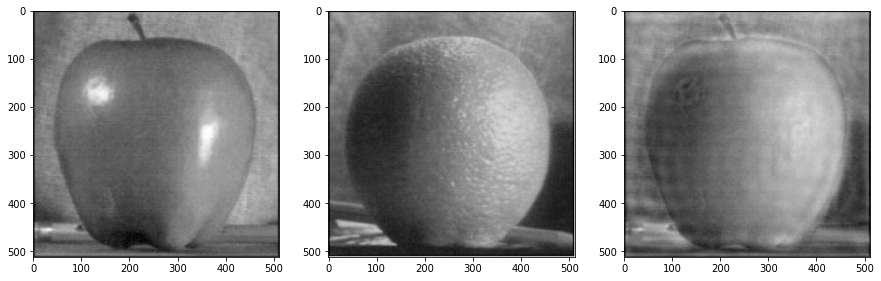

In [19]:
image1 = cv2.imread('images/apple_original.jpg', 0)
image2 = cv2.imread('images/orange_original.jpg', 0)

f1 = np.fft.fft2(image1)
fshift1 = np.fft.fftshift(f1)
magnitude_spectrum1 = 20*np.log(np.abs(fshift1))

f2 = np.fft.fft2(image2)
fshift2 = np.fft.fftshift(f2)
magnitude_spectrum2 = 20*np.log(np.abs(fshift2))

for y in range(image1.shape[0]):
    for x in range(image1.shape[1]):
        d = math.sqrt(math.pow(x - (image1.shape[1]/2), 2) + math.pow(y - (image1.shape[0]/2), 2))
        if(d < 15):
            fshift1[y, x] = fshift2[y, x]
            
f_ishift = np.fft.ifftshift(fshift1)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

fig = plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(image1, cmap='gray')

plt.subplot(132)
plt.imshow(image2, cmap='gray')

plt.subplot(133)
plt.imshow(img_back, cmap='gray')